In [4]:

import astropy
import matplotlib
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
from matplotlib.colors import LogNorm
from astropy.wcs import WCS
from astropy import wcs
import astropy.wcs
from astropy.utils.data import get_pkg_data_filename
from astropy.io import fits
import numpy as np
from astropy.coordinates import match_coordinates_sky
from astropy.convolution import Gaussian2DKernel
from scipy.signal import convolve as scipy_convolve
from astropy.convolution import convolve, convolve_fft
from astropy.convolution import interpolate_replace_nans
from astropy.nddata.utils import Cutout2D
import matplotlib.pyplot as mpl
from matplotlib import cm
import matplotlib as mp
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import matplotlib.colors
import astropy.units as u
from spectral_cube import SpectralCube
from matplotlib.colors import LogNorm
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import axes3d
import plotly.graph_objects as go
import skimage.measure as measure
from skimage.draw import polygon2mask
import skimage as ski
plt.rcParams['text.usetex'] = True

In [2]:
from astropy.visualization.wcsaxes import WCSAxes
import numpy as np
import scipy

In [5]:
x3_filename = "Xray_Clavel_chandra_pigs_cube_smoothed_3k_updated.fits"
x3_hdu      = fits.open(x3_filename)[0]
x3_wcs = WCS(x3_hdu.header)

x2_filename = "Xray_Clavel_chandra_pigs_cube_smoothed_2k_updated.fits"
x2_hdu      = fits.open(x2_filename)[0]
x2_wcs = WCS(x2_hdu.header)

x4_filename = 'Xray_Clavel_chandra_pigs_cube_smoothed_4k_updated_stone_only.fits'
x4_hdu      = fits.open(x4_filename)[0]
x4_wcs = WCS(x4_hdu.header)

h_filename = "data/Herschel_column.fits"
h_hdu      = fits.open(h_filename)[0]
h_wcs = WCS(h_hdu.header)

h2co_filename = get_pkg_data_filename("G0.068-0.075.H2CO.218.2GHz.fits")
h2co_hdu      = fits.open(h2co_filename)[0]
h2co_wcs = WCS(h2co_hdu.header)

cmzoom = "cmzoom_cutout.regrid.fits"
hdu_cmzoom      = fits.open(cmzoom)[0]
wcs_cmzoom = WCS(hdu_cmzoom.header)



In [2]:
xray_updated = "Clavel_chandra_pigs-cube.fits"
xray_updated_hdu      = fits.open(xray_updated)[0]
xray_updated_wcs = WCS(xray_updated_hdu.header)
wcs_xray_2axis=xray_updated_wcs.dropaxis(2)


In [3]:
#smoothing Xray data
kernel   = Gaussian2DKernel(3) #originally set to 10
# Mask NaNs
xray_updated_hdu.data[np.isnan(xray_updated_hdu.data)] = 0
# Smooth each slice in turn
for i in range(0, len(xray_updated_hdu.data)):
    xray_updated_hdu.data[i] = convolve(xray_updated_hdu.data[i], kernel)
#Save new FITS file containing each smoothed slice
fits.writeto("Xray_Clavel_chandra_pigs_cube_smoothed_3k_updated.fits", xray_updated_hdu.data, xray_updated_hdu.header, overwrite=True)

In [4]:
x3_filename = "Xray_Clavel_chandra_pigs_cube_smoothed_3k_updated.fits"
x3_hdu      = fits.open(x3_filename)[0]
x3_wcs = WCS(x3_hdu.header)

x2_filename = "Xray_Clavel_chandra_pigs_cube_smoothed_2k_updated.fits"
x2_hdu      = fits.open(x2_filename)[0]
x2_wcs = WCS(x2_hdu.header)

x4_filename = 'Xray_Clavel_chandra_pigs_cube_smoothed_4k_updated_stone_only.fits'
x4_hdu      = fits.open(x4_filename)[0]
x4_wcs = WCS(x4_hdu.header)

In [6]:
#drop third axis of data cubes
wcs_2xray_2axis=x2_wcs.dropaxis(2)
wcs_3xray_2axis=x3_wcs.dropaxis(2)
wcs_4xray_2axis=x4_wcs.dropaxis(2)
#wcs_H2CO_2axis=h2co_wcs.dropaxis(2)

In [18]:
sio_spec = fits.open('data/CMZ_3mm_SiO.fits')
sio_cube = SpectralCube.read(sio_spec) 
sio_spec.close()

h2co_spec = fits.open('G0.068-0.075.H2CO.218.5GHz.fits')
h2co_cube = SpectralCube.read(h2co_spec) 
h2co_spec.close()

(0.0, 150.0)

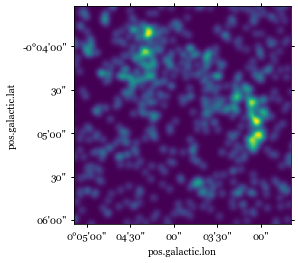

In [8]:
matplotlib.rcParams['mathtext.fontset'] = "cm" 
matplotlib.rcParams['font.family'] = "georgia" 
plt.subplot(1,1,1 ,projection=wcs_3xray_2axis, slices=('x', 'y'))
plt.imshow(x2_hdu.data[10])

plt.xlim(150,300)
plt.ylim(0,150)

AttributeError: 'WCSAxesSubplot' object has no attribute 'set_edgecolor'

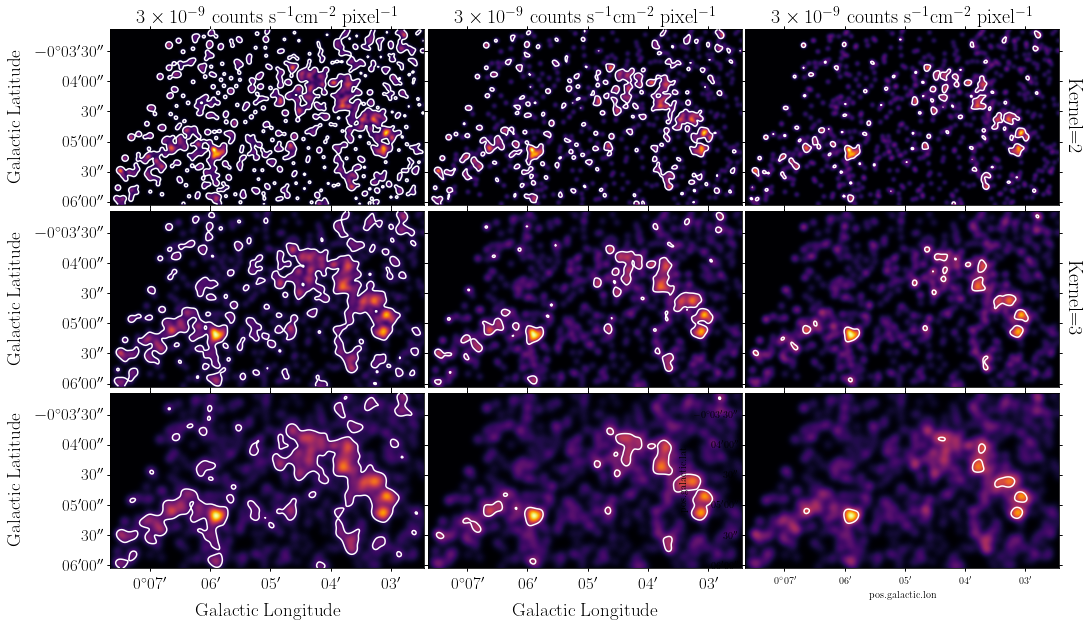

In [6]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from astropy.visualization.wcsaxes import WCSAxes
import numpy as np
import scipy
from mpl_toolkits.axes_grid1 import ImageGrid
matplotlib.rcParams['mathtext.fontset'] = "cm" 
matplotlib.rcParams['font.family'] = "georgia" 

row=3
col=3
xray_start=11
fig_smooth = plt.figure(figsize=(17 ,10))
fig_smooth.subplots_adjust(wspace=0.01, hspace=0.01)
label_row=['Kernel=2', 'Kernel=3','Kernel=4']
level=[3e-9,5e-9,7e-9]
titles=[r'$3 \times 10^{-9}$',r'3 \times 10^{-9}$',r'3 \times 10^{-9}$']
counter=0
for i in range(row):
    for j in range(col):
        
        coord=plt.subplot(row,col,counter+1 ,projection=wcs_2xray_2axis, slices=('x', 'y'))
        lon = coord.coords[0]
        lat = coord.coords[1]
        
        if i==0:
            plt.imshow(x2_hdu.data[xray_start],cmap='inferno')
            coord.contour(x2_hdu.data[xray_start], colors='white', transform=coord.get_transform(wcs_4xray_2axis),levels=[level[j]])
            coord.set_title(titles[i]+ r" $ \rm counts$"+ r" $\rm s^{-1} cm^{-2}$" +r" $\rm pixel^{-1}$", size=20)

        if i==1:
            plt.imshow(x3_hdu.data[xray_start],cmap='inferno')
            coord.contour(x3_hdu.data[xray_start], colors='white', transform=coord.get_transform(wcs_4xray_2axis),levels=[level[j]])
            
        if i==2:
            plt.imshow(x4_hdu.data[xray_start],cmap='inferno')
            coord.contour(x4_hdu.data[xray_start], colors='white', transform=coord.get_transform(wcs_4xray_2axis),levels=[level[j]])
        if (i==2 and j==2) or (i==3 and j==0):
            coord.set_edgecolor('blue')   # Change outline color (e.g., blue)
            coord.set_linewidth(3)        # Make the outline bold (thicker)

        if counter>=((col*row)-col):
            coord.set_xlabel('Galactic Longitude',fontsize=19)
        else:
            lon.set_ticklabel_visible(False)
            lon.set_axislabel('')

        if counter%col==0:
            # coord.set_ylabel('Galactic Latitude',fontsize=19)
            coord.set_ylabel('Galactic Latitude',fontsize=19)
        else:
            lat.set_ticklabel_visible(False)
            lat.set_axislabel('')
        lon.set_ticklabel(size=17)
        lat.set_ticklabel(size=17)
        counter+=1

        if j==2:
            title = coord.set_title(str(label_row[i]), loc="right", y=.5, rotation=270, ha="left", va="center", size=20)
            offset_trans = mpl.transforms.ScaledTranslation(
            mpl.rcParams["axes.titlepad"] / 72, 0, coord.figure.dpi_scale_trans)
            title.set_transform(coord.transAxes + offset_trans)

plt.tight_layout(pad=0.5, w_pad=0.5, h_pad=0.0)


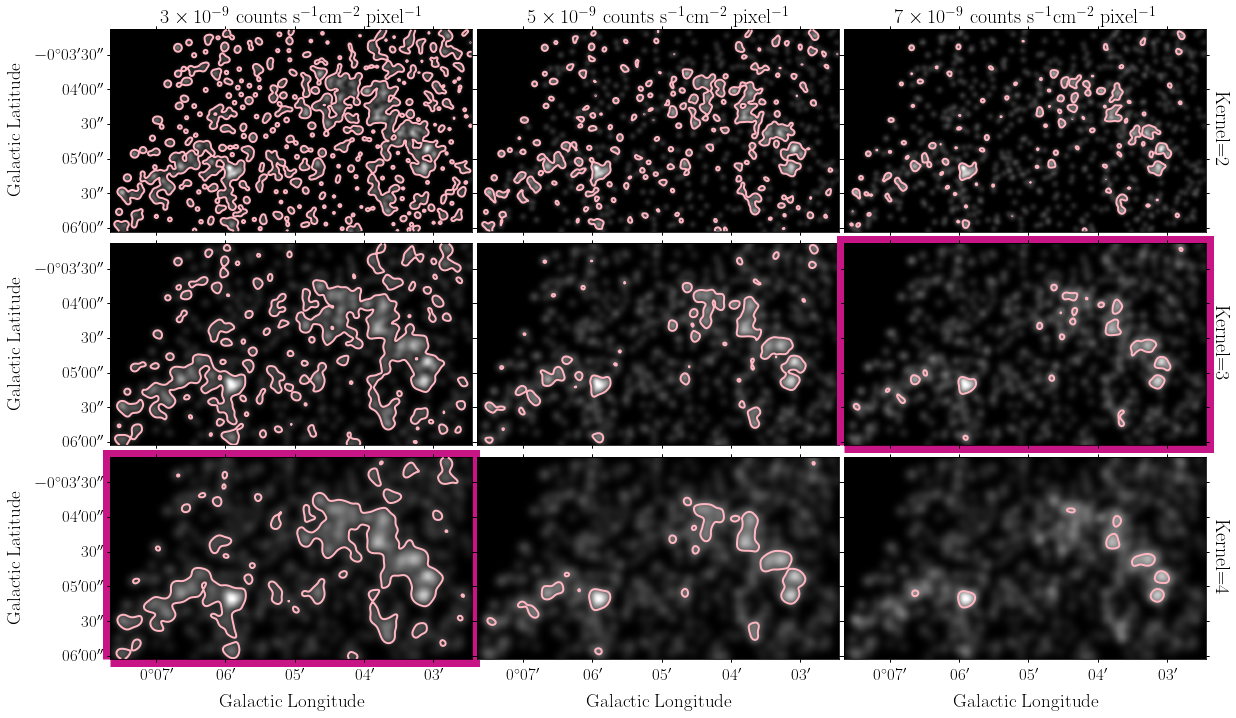

In [7]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from astropy.visualization.wcsaxes import WCSAxes
import numpy as np
import scipy
from mpl_toolkits.axes_grid1 import ImageGrid

mpl.rcParams['mathtext.fontset'] = "cm" 
mpl.rcParams['font.family'] = "georgia" 
row = 3
col = 3
xray_start = 11
fig_smooth = plt.figure(figsize=(17, 10))
fig_smooth.subplots_adjust(wspace=0.01, hspace=0.01)
label_row = ['Kernel=2', 'Kernel=3', 'Kernel=4']
level = [3e-9, 5e-9, 7e-9]
titles = [r'$3 \times 10^{-9}$', r'$5 \times 10^{-9}$', r'$7 \times 10^{-9}$']
counter = 0

for i in range(row):
    for j in range(col):
        
        coord = plt.subplot(row, col, counter + 1, projection=wcs_2xray_2axis, slices=('x', 'y'))
        lon = coord.coords[0]
        lat = coord.coords[1]
        
        if i == 0:
            plt.imshow(x2_hdu.data[xray_start], cmap='gray')
            coord.contour(x2_hdu.data[xray_start], colors='lightpink', transform=coord.get_transform(wcs_4xray_2axis), levels=[level[j]],linewidths=2)
            coord.set_title(titles[j] + r" $ \rm counts$" + r" $\rm s^{-1} cm^{-2}$" + r" $\rm pixel^{-1}$", size=20)

        if i == 1:
            plt.imshow(x3_hdu.data[xray_start], cmap='gray')
            coord.contour(x3_hdu.data[xray_start], colors='lightpink', transform=coord.get_transform(wcs_4xray_2axis), levels=[level[j]],linewidths=2)

        if i == 2:
            plt.imshow(x4_hdu.data[xray_start], cmap='gray')
            coord.contour(x4_hdu.data[xray_start], colors='lightpink', transform=coord.get_transform(wcs_4xray_2axis), levels=[level[j]],linewidths=2)

        # Apply bold outline to subplots 5 (i=1, j=2) and 6 (i=2, j=0)
        if (i == 1 and j == 2) or (i == 2 and j == 0):
            coord.patch.set_edgecolor('mediumvioletred')   # Change outline color (e.g., blue)
            coord.patch.set_linewidth(15)        # Make the outline bold (thicker)
            #coord.patch.set_facecolor('none')   # Keep the background transparent
        if counter >= ((col * row) - col):
            coord.set_xlabel('Galactic Longitude', fontsize=19)
        else:
            lon.set_ticklabel_visible(False)
            lon.set_axislabel('')

        if counter % col == 0:
            coord.set_ylabel('Galactic Latitude', fontsize=19)
        else:
            lat.set_ticklabel_visible(False)
            lat.set_axislabel('')

        lon.set_ticklabel(size=17)
        lat.set_ticklabel(size=17)
        counter += 1

        if j == 2:
            title = coord.set_title(str(label_row[i]), loc="right", y=.5, rotation=270, ha="left", va="center", size=20)
            offset_trans = mpl.transforms.ScaledTranslation(
                mpl.rcParams["axes.titlepad"] / 72, 0, coord.figure.dpi_scale_trans)
            title.set_transform(coord.transAxes + offset_trans)

plt.tight_layout(pad=0.5, w_pad=0.5, h_pad=0.0)
plt.show()

In [14]:
x4_hdu.data[0].shape

(17, 130, 164)

/Users/danyaalboslani/opt/anaconda3/lib/python3.8/site-packages/astropy/visualization/wcsaxes/core.py:254: UserWarning: No contour levels were found within the data range.
  cset = super().contour(*args, **kwargs)


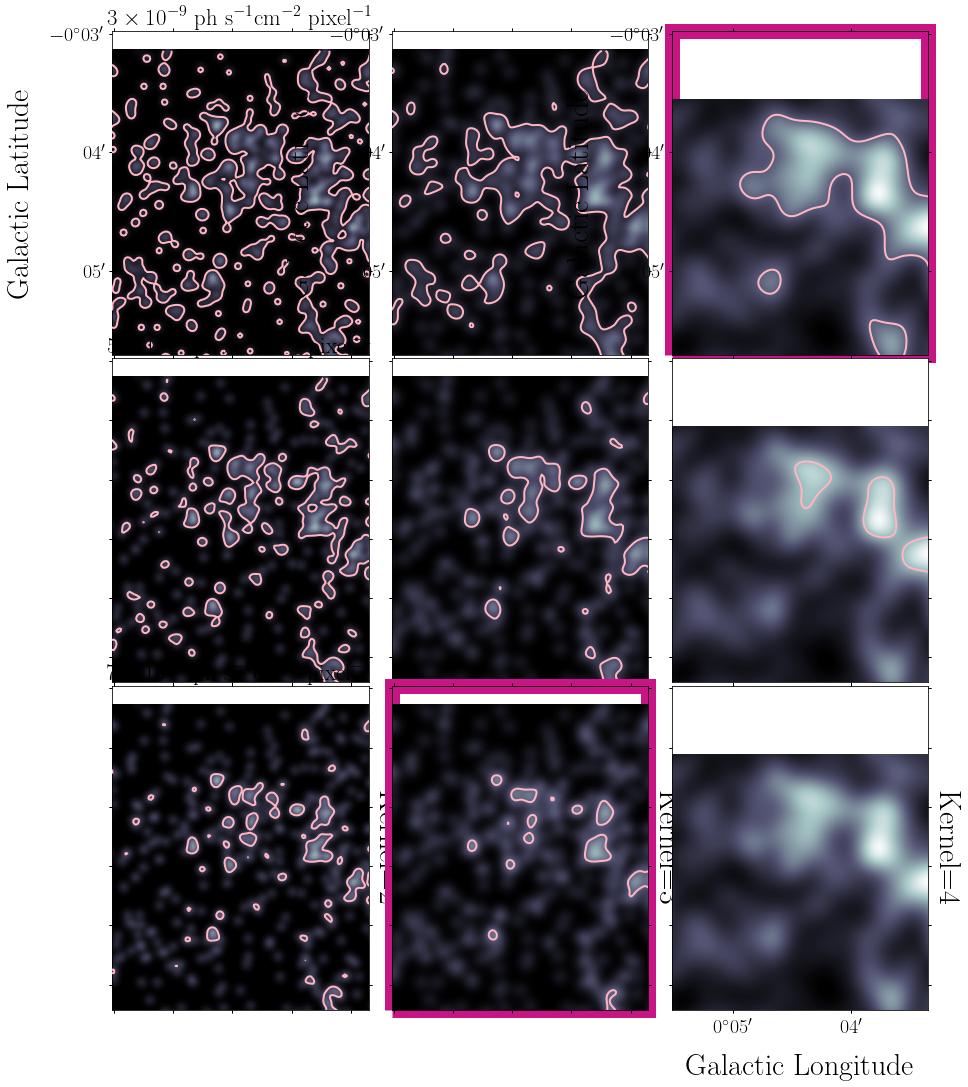

In [33]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from astropy.visualization.wcsaxes import WCSAxes
import numpy as np
import scipy
from mpl_toolkits.axes_grid1 import ImageGrid

mpl.rcParams['font.family'] = "georgia" 
row = 3
col = 3
xray_start = 11
fig_smooth = plt.figure(figsize=(15, 18))
fig_smooth.subplots_adjust(wspace=0.01, hspace=0.01)
label_row = ['Kernel=2', 'Kernel=3', 'Kernel=4']
level = [3e-9, 5e-9, 7e-9]
titles = [r'$3 \times 10^{-9}$', r'$5 \times 10^{-9}$', r'$7 \times 10^{-9}$']
counter = 0
xmin=0
ymin=0
xmax=130
ymax=164
#projections=[wcs_2xray_2axis,wcs_2xray_2axis,wcs_2xray_2axis,wcs_2xray_2axis,wcs_2xray_2axis,wcs_2xray_2axis,wcs_4xray_2axis,wcs_4xray_2axis,wcs_4xray_2axis]
projections=[wcs_2xray_2axis,wcs_2xray_2axis,wcs_4xray_2axis,wcs_2xray_2axis,wcs_2xray_2axis,wcs_4xray_2axis,wcs_2xray_2axis,wcs_2xray_2axis,wcs_4xray_2axis]
ra_min, dec_min = wcs_4xray_2axis.all_pix2world(xmin, ymin, 0)
ra_max, dec_max = wcs_4xray_2axis.all_pix2world(xmax, ymax, 0)
for i in range(row):
    for j in range(col):
        index = i + j * col
        #coord = plt.subplot(row, col, counter + 1, projection=wcs_xray_2axis, slices=('x', 'y'))
        coord = plt.subplot(row, col, index + 1, projection=projections[index])
        lon = coord.coords[0]
        lat = coord.coords[1]
        
        if i == 0:
            plt.imshow(x2_hdu.data[xray_start], cmap='bone')
            coord.contour(x2_hdu.data[xray_start], colors='lightpink', transform=coord.get_transform(wcs_2xray_2axis), levels=[level[j]],linewidths=2)
            coord.set_title(titles[j] + r" $ \rm ph$" + r" $\rm s^{-1} cm^{-2}$" + r" $\rm pixel^{-1}$", size=23)

        if i == 1:
            plt.imshow(x3_hdu.data[xray_start], cmap='bone')
            coord.contour(x3_hdu.data[xray_start], colors='lightpink', transform=coord.get_transform(wcs_2xray_2axis), levels=[level[j]],linewidths=2)

        if i == 2:
            plt.imshow(x4_hdu.data[xray_start], cmap='bone')
            coord.contour(x4_hdu.data[xray_start], colors='lightpink', transform=coord.get_transform(wcs_4xray_2axis), levels=[level[j]],linewidths=2)

        # Apply bold outline to subplots 5 (i=1, j=2) and 6 (i=2, j=0)
        if (i == 1 and j == 2) or (i == 2 and j == 0):
            coord.patch.set_edgecolor('mediumvioletred')   # Change outline color (e.g., blue)
            coord.patch.set_linewidth(15)        # Make the outline bold (thicker)
            #coord.patch.set_facecolor('none')   # Keep the background transparent

        x_min_new, y_min_new =projections[index].all_world2pix(ra_min, dec_min, 0)
        x_max_new, y_max_new = projections[index].all_world2pix(ra_max, dec_max, 0)
        coord.set_xlim(x_min_new, x_max_new)
        coord.set_ylim(y_min_new, y_max_new)
        if counter >= ((col * row) - col):
            coord.set_xlabel('Galactic Longitude', fontsize=30)
            lon.set_major_formatter('dd:mm')
        else:
            lon.set_ticklabel_visible(False)
            lon.set_axislabel('')

        if counter % col == 0:
            coord.set_ylabel('Galactic Latitude', fontsize=30)
            lat.set_major_formatter('dd:mm')
        else:
            lat.set_ticklabel_visible(False)
            lat.set_axislabel('')

        lon.set_ticklabel(size=20)
        lat.set_ticklabel(size=20)
        counter += 1

        if j == 2:
            title = coord.set_title(str(label_row[i]), loc="right", y=.5, rotation=270, ha="left", va="center", size=30)
            offset_trans = mpl.transforms.ScaledTranslation(
                mpl.rcParams["axes.titlepad"] / 72, 0, coord.figure.dpi_scale_trans)
            title.set_transform(coord.transAxes + offset_trans)
plt.show()

/Users/danyaalboslani/opt/anaconda3/lib/python3.8/site-packages/astropy/visualization/wcsaxes/core.py:254: UserWarning: No contour levels were found within the data range.
  cset = super().contour(*args, **kwargs)


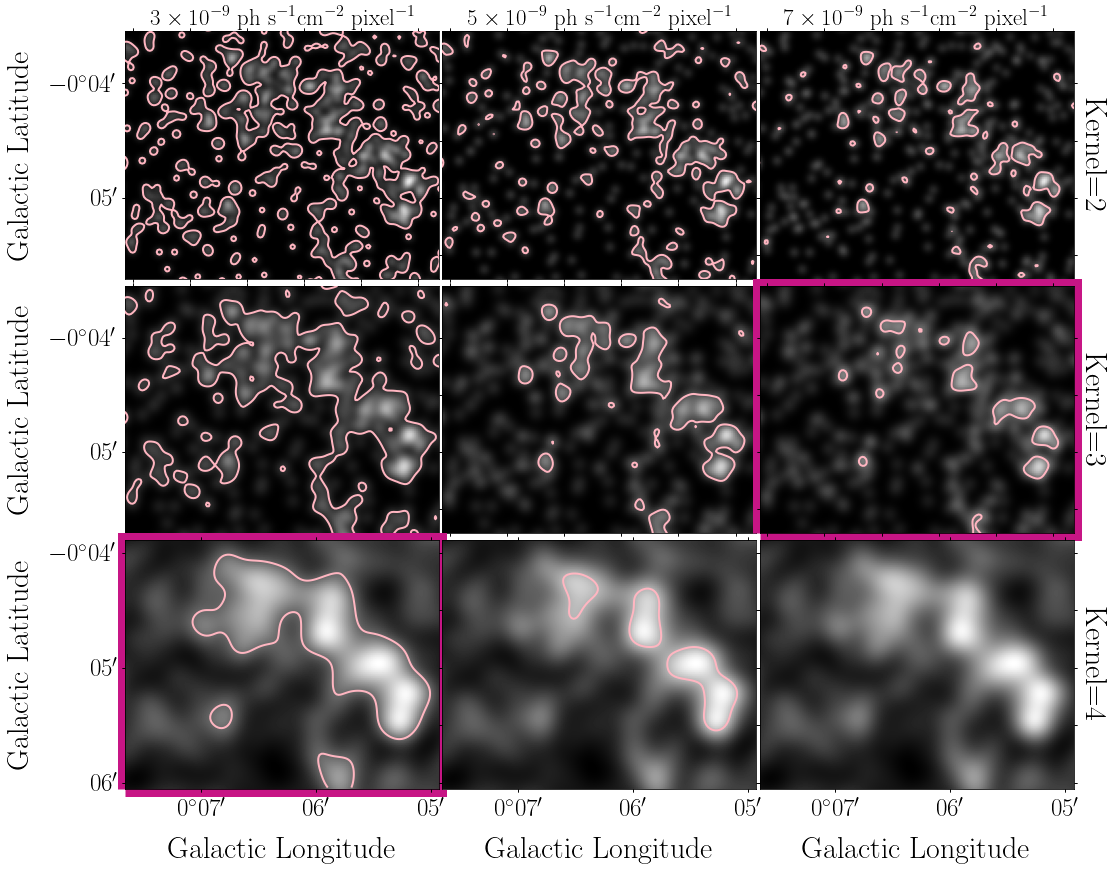

In [43]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from astropy.visualization.wcsaxes import WCSAxes
import numpy as np
import scipy
from mpl_toolkits.axes_grid1 import ImageGrid

mpl.rcParams['font.family'] = "georgia" 
matplotlib.rcParams['mathtext.fontset'] = "cm"
row = 3
col = 3
xray_start = 11
fig_smooth = plt.figure(figsize=(17, 14))
fig_smooth.subplots_adjust(wspace=0.01, hspace=0.01)
label_row = ['Kernel=2', 'Kernel=3', 'Kernel=4']
level = [3e-9, 5e-9, 7e-9]
titles = [r'$3 \times 10^{-9}$', r'$5 \times 10^{-9}$', r'$7 \times 10^{-9}$']
counter = 0

for i in range(row):
    for j in range(col):
        
        coord = plt.subplot(row, col, counter + 1, projection=wcs_xray_2axis, slices=('x', 'y'))
        lon = coord.coords[0]
        lat = coord.coords[1]
        
        if i == 0:
            plt.imshow(x2_hdu.data[xray_start], cmap='gray')
            coord.contour(x2_hdu.data[xray_start], colors='lightpink', transform=coord.get_transform(wcs_xray_2axis), levels=[level[j]],linewidths=2)
            coord.set_title(titles[j] + r" $ \rm ph$" + r" $\rm s^{-1} cm^{-2}$" + r" $\rm pixel^{-1}$", size=23)

        if i == 1:
            plt.imshow(x3_hdu.data[xray_start], cmap='gray')
            coord.contour(x3_hdu.data[xray_start], colors='lightpink', transform=coord.get_transform(wcs_xray_2axis), levels=[level[j]],linewidths=2)

        if i == 2:
            plt.imshow(x4_hdu.data[xray_start], cmap='gray')
            coord.contour(x4_hdu.data[xray_start], colors='lightpink', transform=coord.get_transform(wcs_xray_2axis), levels=[level[j]],linewidths=2)

        # Apply bold outline to subplots 5 (i=1, j=2) and 6 (i=2, j=0)
        if (i == 1 and j == 2) or (i == 2 and j == 0):
            coord.patch.set_edgecolor('mediumvioletred')   # Change outline color (e.g., blue)
            coord.patch.set_linewidth(15)        # Make the outline bold (thicker)
            #coord.patch.set_facecolor('none')   # Keep the background transparent
        if i==0 or i==1:
            coord.set_xlim(125,290)
            coord.set_ylim(20,150)
        if counter >= ((col * row) - col):
            coord.set_xlabel('Galactic Longitude', fontsize=30)
            lon.set_major_formatter('dd:mm')
        else:
            lon.set_ticklabel_visible(False)
            lon.set_axislabel('')

        if counter % col == 0:
            coord.set_ylabel('Galactic Latitude', fontsize=30)
            lat.set_major_formatter('dd:mm')
        else:
            lat.set_ticklabel_visible(False)
            lat.set_axislabel('')

        lon.set_ticklabel(size=25)
        lat.set_ticklabel(size=25)
        counter += 1

        if j == 2:
            title = coord.set_title(str(label_row[i]), loc="right", y=.5, rotation=270, ha="left", va="center", size=30)
            offset_trans = mpl.transforms.ScaledTranslation(
                mpl.rcParams["axes.titlepad"] / 72, 0, coord.figure.dpi_scale_trans)
            title.set_transform(coord.transAxes + offset_trans)
plt.show()

/Users/danyaalboslani/opt/anaconda3/lib/python3.8/site-packages/astropy/visualization/wcsaxes/core.py:254: UserWarning: The following kwargs were not used by contour: 'color'
  cset = super().contour(*args, **kwargs)


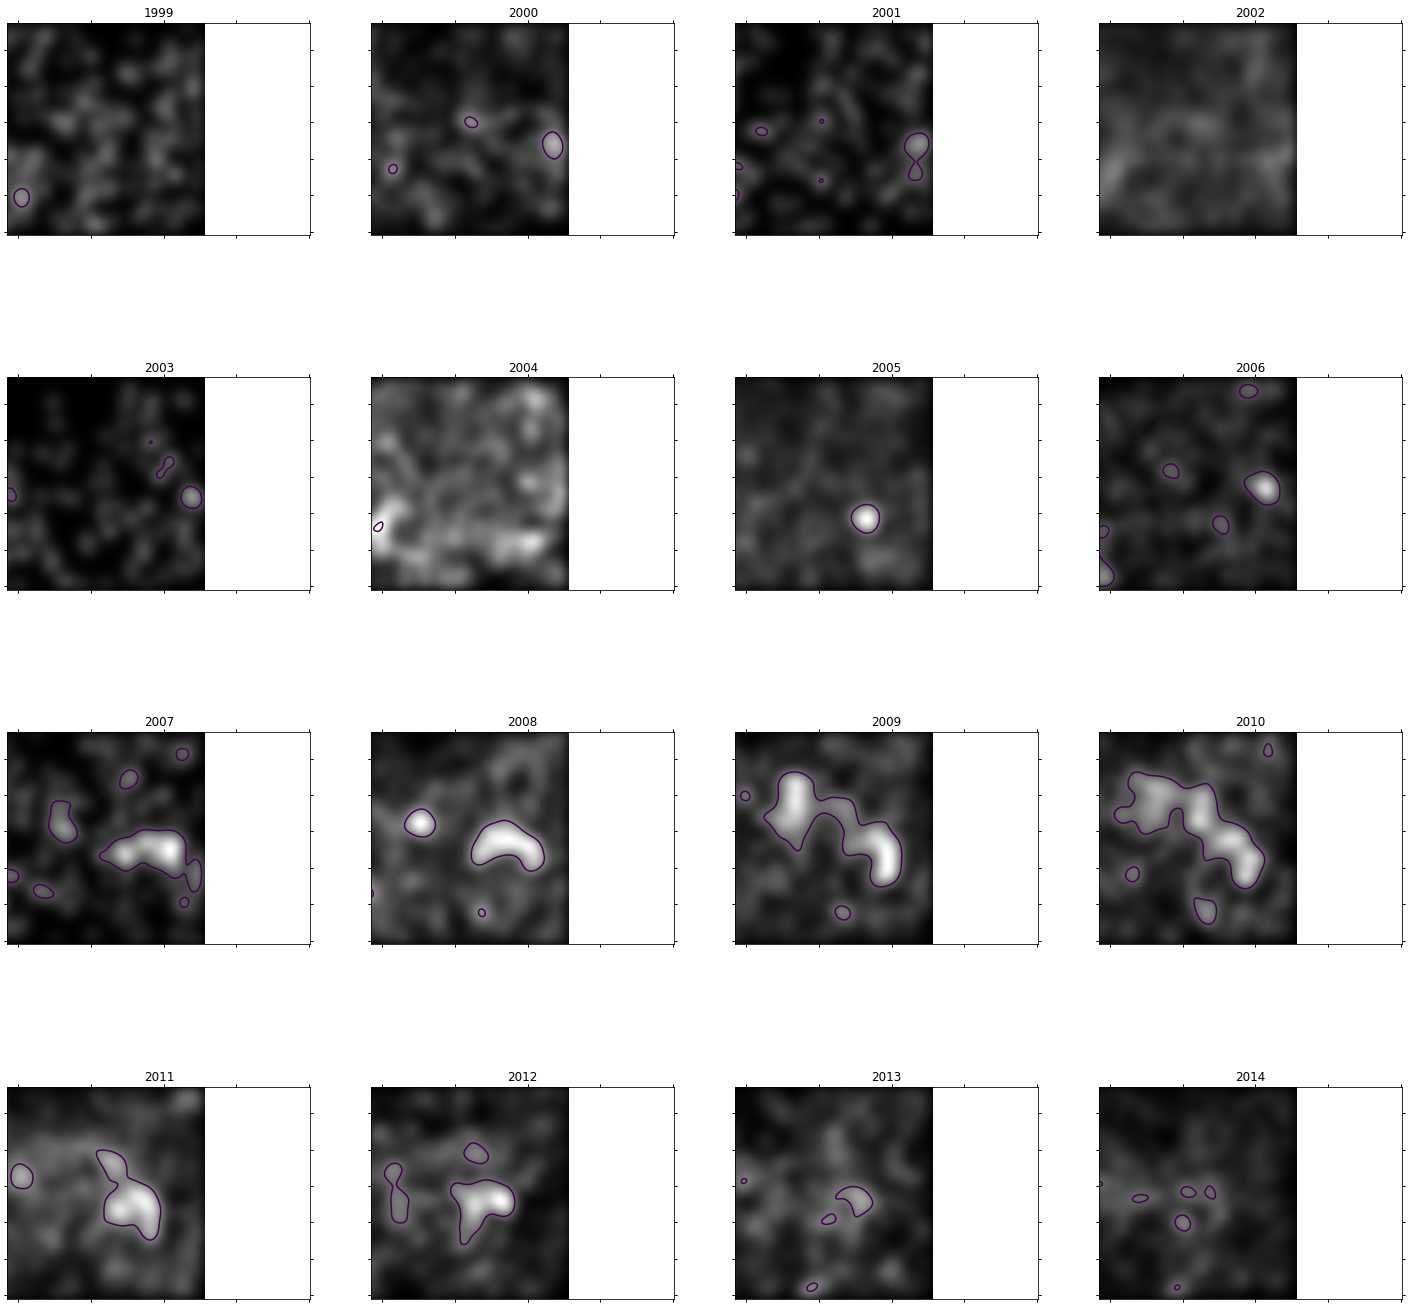

In [13]:
fig_xray = plt.figure(figsize=(25,25))
plt.rcParams['text.usetex'] = False
row=4
col=4
xray_start=0
for i in range(row * col):
    coord = plt.subplot(row, col, i + 1, projection=wcs_xray_2axis, slices=('x', 'y'))
    lon = coord.coords[0]
    lat = coord.coords[1]
    plt.imshow(x4_hdu.data[xray_start + i],cmap='gray')
    plt.title(str(1999+i))
    plt.contour(x4_hdu.data[xray_start + i],levels=[3e-9],color='white')
    plt.xlim(150,400)
    lon.set_ticklabel_visible(False)
    lon.set_axislabel('')
    lat.set_ticklabel_visible(False)
    lat.set_axislabel('')
    

In [12]:
fig_smooth.savefig('smoothing_contours_stone.pdf',bbox_inches='tight')

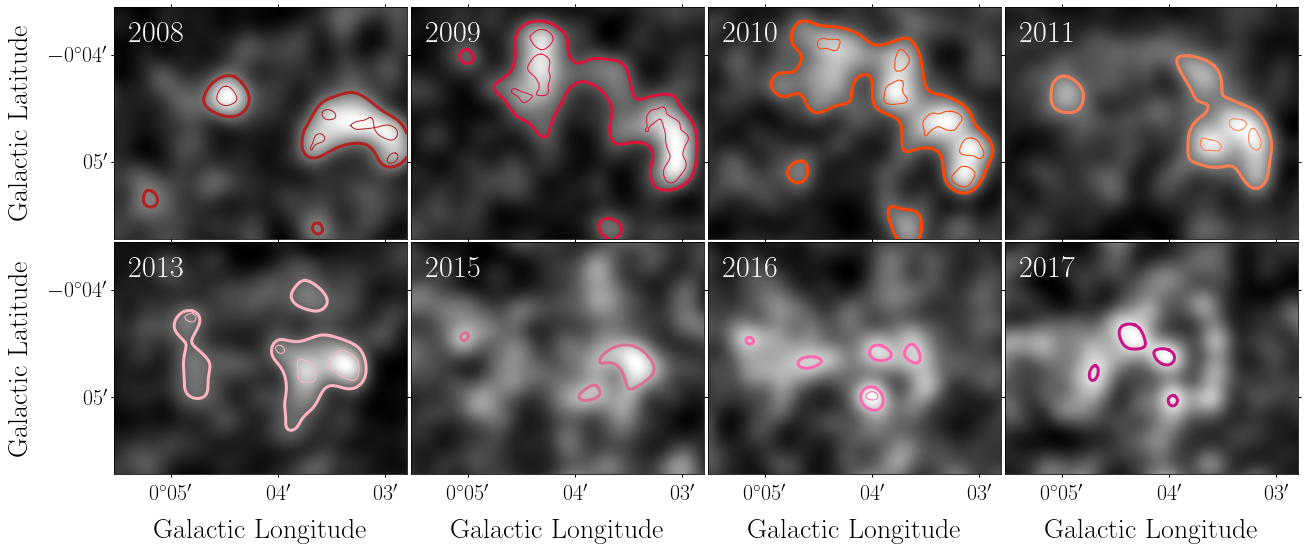

In [85]:
fig_xray = plt.figure(figsize=(18, 7.5))
fig_xray.subplots_adjust(wspace=0.1, hspace=0.1)
row=2
col=4
xray_start=9
xray_year=1999+xray_start
count=0
mpl.rcParams['font.family'] = "georgia" 
colors=['firebrick', 'crimson', 'orangered', 'coral', 'lightpink', 'palevioletred', 'hotpink', 'mediumvioletred']

for i in range(row * col):
    coord = plt.subplot(row, col, i + 1, projection=wcs_4xray_2axis, slices=('x', 'y'))
    lon = coord.coords[0]
    lat = coord.coords[1]

    plt.imshow(x4_hdu.data[xray_start + i],cmap='gray')
    #coord.contour(x4_hdu.data[xray_start + i], colors=colors[i], linewidths=3, transform=coord.get_transform(wcs_4xray_2axis), levels=[3e-9])
   # coord.contour(x3_hdu.data[xray_start + i], colors=colors[i], linewidths=1, transform=coord.get_transform(wcs_3xray_2axis), levels=[7e-9])
    #coord.text(0.40, 0.85, str(round(xray_year, 1)), fontsize=25, transform=coord.transAxes,color="white")# bbox=dict(facecolor='white', alpha=0.9)
    c2_k4_17 = measure.find_contours(x4_hdu.data[xray_start+i], 3e-9)
    for j in c2_k4_17:
        if max(j[:,1])-min(j[:,1])>2:     #giving it a minimum width
                coord.plot(j[:, 1], j[:, 0], linewidth=3, color=colors[i],transform=coord.get_transform(wcs_4xray_2axis))
    c2_k3_17 = measure.find_contours(x3_hdu.data[xray_start+i], 7e-9)
    for j in c2_k3_17:
        if j[0,1]>150 and max(j[:,1])-min(j[:,1])>5:     #giving it a minimum width
                coord.plot(j[:, 1], j[:, 0], linewidth=1, color=colors[i],transform=coord.get_transform(wcs_3xray_2axis)) 
    coord.text(0.05, 0.85, str(round(xray_year, 1)), fontsize=30, transform=coord.transAxes,color="white",weight='bold')# bbox=dict(facecolor='white', alpha=0.9)
    

    if (xray_year) == 2011 or (xray_year) == 2013:
        xray_year += 2
    else:
        xray_year += 1
    if i >= ((col * row) - col):
        coord.set_xlabel('Galactic Longitude', fontsize=28)
    else:
        lon.set_ticklabel_visible(False)
        lon.set_axislabel('')

    if i % col == 0:
        coord.set_ylabel('Galactic Latitude', fontsize=28)
    else:
        lat.set_ticklabel_visible(False)
        lat.set_axislabel('')
    lon.set_ticklabel(size=22)
    lat.set_major_formatter('dd:mm')
    lon.set_major_formatter('dd:mm')
    lat.set_ticklabel(size=22)

plt.tight_layout(pad=0.1, w_pad=0.1, h_pad=0.1)

plt.show()


In [86]:
fig_xray.savefig('xray_smoothed_contours.pdf',bbox_inches='tight',dpi=300)

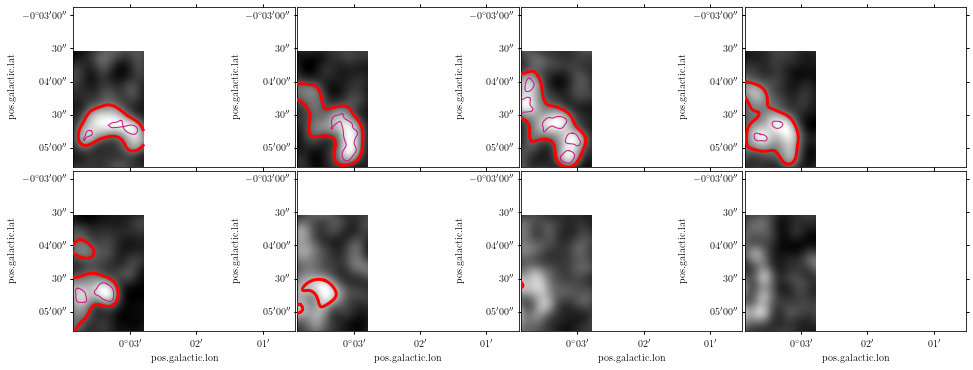

In [51]:
fig_xray = plt.figure(figsize=(16, 6))
fig_xray.subplots_adjust(wspace=0.01, hspace=0.01)
row=2
col=4
xray_start=9
xray_year=1999+xray_start
count=0

colors=['firebrick', 'crimson', 'orangered', 'coral', 'lightpink', 'palevioletred', 'hotpink', 'mediumvioletred']

for j in range(row * col):
    coord = plt.subplot(row, col, j + 1, projection=wcs_4xray_2axis, slices=('x', 'y'))
    lon = coord.coords[0]
    lat = coord.coords[1]

    plt.imshow(x4_hdu.data[xray_start + j],cmap='gray')
    c2_k4_17 = measure.find_contours(x4_hdu.data[xray_start+j], 3e-9)
    for i in c2_k4_17:
        if max(i[:,1])-min(i[:,1])>10:     #giving it a minimum width
                coord.plot(i[:, 1], i[:, 0], linewidth=3, color='red',transform=coord.get_transform(wcs_4xray_2axis))
    c2_k3_17 = measure.find_contours(x3_hdu.data[xray_start+j], 7e-9)
    for i in c2_k3_17:
        if max(i[:,1])-min(i[:,1])>8:     #giving it a minimum width
                coord.plot(i[:, 1], i[:, 0], linewidth=1, color='mediumvioletred',transform=coord.get_transform(wcs_3xray_2axis)) 
    coord.text(0.40, 0.85, str(round(xray_year, 1)), fontsize=25, transform=coord.transAxes,color="white")# bbox=dict(facecolor='white', alpha=0.9)
    coord.set_ylim(25,170)
    coord.set_xlim(100,300)

plt.show()


In [ ]:
fig_xray.savefig('xray_contours.pdf',bbox_inches='tight')

In [ ]:
fig_xray = plt.figure(figsize=(21, 6))
fig_xray.subplots_adjust(wspace=0, hspace=0)
row=2
col=4


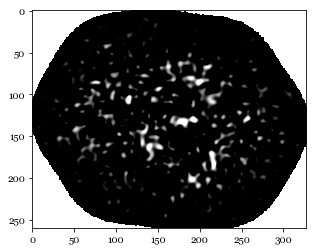

In [ ]:
fig=plt.figure()

ax = fig.add_subplot(111)
ax.imshow(h2co_cube.unmasked_data[72],vmin=0.07,vmax=0.25,cmap='gray')



In [21]:
h2co_cube

SpectralCube with shape=(247, 260, 328) and unit=Jy / beam:
 n_x:    328  type_x: GLON-SIN  unit_x: deg    range:     0.046397 deg:    0.091813 deg
 n_y:    260  type_y: GLAT-SIN  unit_y: deg    range:    -0.094934 deg:   -0.058962 deg
 n_s:    247  type_s: VRAD      unit_s: km / s  range:     -137.143 km / s:     137.315 km / s

In [82]:
def single_coord(file,coord):
    hdu,wcs=file 
    pos = SkyCoord(frame="galactic", l=coord[0], b=coord[1], unit=(u.deg))
    x, y = wcs.world_to_pixel(pos)
    return (x, y)

def crop(filename,hdu,wcs, min_coords,max_coords, output_filename):
    file = open_files(filename)
    pixel_min= single_coord(file,min_coords)
    pixel_max=single_coord(file,max_coords)
    pixel_width=np.abs(pixel_max[0]-pixel_min[0])
    pixel_length=np.abs(pixel_max[1]-pixel_min[1])
    pixel_center= [pixel_min[0]+(pixel_max[0]-pixel_min[0])/2,pixel_min[1]+(pixel_max[1]-pixel_min[1])/2]

    cutout          = Cutout2D(hdu, position=[pixel_center[0], pixel_center[1]],
                    size=(pixel_length,pixel_width), wcs=wcs)
    hdu.data        = cutout.data
    hdu.header.update(cutout.wcs.to_header())
    hdu.writeto(output_filename, overwrite=True)

def open_files(file):
    filename = file
    hdu  = fits.open(filename)[0]
    wcs=WCS(hdu.header)
    if hdu.header['NAXIS']==3:
        wcs=wcs.dropaxis(2)
    return hdu, wcs

In [87]:
x_min = 0
x_max = 328
y_min = 0
y_max = 260

x4_filename = "Xray_Clavel_chandra_pigs_cube_smoothed_4k_updated.fits"
hdu      = fits.open(x4_filename)[0]
wcs = (WCS(hdu.header)).dropaxis(2)

min: 0.09119754654552792 -0.09530400497220076  max: 0.04786609567823752 -0.05849878049290471

h2co_filename = get_pkg_data_filename("G0.068-0.075.H2CO.218.2GHz.fits")
h2co_hdu      = fits.open(h2co_filename)[0]
h2co_wcs = WCS(h2co_hdu.header)
h2co_wcs=h2co_wcs.dropaxis(2)


min_coords = h2co_wcs.all_pix2world(x_min, y_min, 0)
max_coords = h2co_wcs.all_pix2world(x_max, y_max, 0)

file = open_files("Xray_Clavel_chandra_pigs_cube_smoothed_4k_updated.fits")
pixel_min= single_coord(file,min_coords)
pixel_max=single_coord(file,max_coords)

pixel_width=np.abs(pixel_max[0]-pixel_min[0])
pixel_length=np.abs(pixel_max[1]-pixel_min[1])
pixel_center= [pixel_min[0]+(pixel_max[0]-pixel_min[0])/2,pixel_min[1]+(pixel_max[1]-pixel_min[1])/2]

for i in range(17):
    cutout          = Cutout2D(hdu.data[i], position=[pixel_center[0], pixel_center[1]],
                    size=(pixel_length,pixel_width), wcs=wcs)
    hdu.data        = cutout.data
    hdu.header.update(cutout.wcs.to_header())
    hdu.writeto('stone_xray_4k_{}.fits'.format(i), overwrite=True)

130.70886466406427


In [113]:
x_min = 0
x_max = 328
y_min = 0
y_max = 260

x4_filename = "Xray_Clavel_chandra_pigs_cube_smoothed_4k_updated.fits"
hdu      = fits.open(x4_filename)[0]
wcs = (WCS(hdu.header))

#min: 0.09119754654552792 -0.09530400497220076  max: 0.04786609567823752 -0.05849878049290471

h2co_filename = get_pkg_data_filename("G0.068-0.075.H2CO.218.2GHz.fits")
h2co_hdu      = fits.open(h2co_filename)[0]
h2co_wcs = WCS(h2co_hdu.header)
h2co_wcs=h2co_wcs.dropaxis(2)


min_coords = [0.09119754654552792,-0.0953040049722007]
max_coords = [0.04786609567823752,-0.05849878049290471]
min_coords = h2co_wcs.all_pix2world(x_min, y_min, 0)
max_coords = h2co_wcs.all_pix2world(x_max, y_max, 0)

file = open_files("Xray_Clavel_chandra_pigs_cube_smoothed_4k_updated.fits")
pixel_min= single_coord(file,min_coords)
pixel_max=single_coord(file,max_coords)

print(pixel_min, pixel_max)
pixel_width=np.abs(pixel_max[0]-pixel_min[0])
pixel_length=np.abs(pixel_max[1]-pixel_min[1])
pixel_center= [pixel_min[0]+(pixel_max[0]-pixel_min[0])/2,pixel_min[1]+(pixel_max[1]-pixel_min[1])/2]

(array(128.49198244), array(20.78786664)) (array(292.49206745), array(150.78782296))


In [116]:
with fits.open("Xray_Clavel_chandra_pigs_cube_smoothed_4k_updated.fits") as hdul:
    data_cube = hdul[0].data
    header = hdul[0].header
    wcs = WCS(header)

# Define pixel boundaries for slicing
x_min = 128
x_max = 292
y_min = 20
y_max = 150

# Crop the data cube
cropped_cube = data_cube[:, y_min:y_max, x_min:x_max]

# Optionally, update the header for the cropped data
cropped_header = wcs.slice((slice(None), slice(y_min, y_max), slice(x_min, x_max))).to_header()

# Save the cropped data cube to a new FITS file
hdu = fits.PrimaryHDU(data=cropped_cube, header=cropped_header)
hdu.writeto("Xray_Clavel_chandra_pigs_cube_smoothed_4k_updated_stone_only.fits", overwrite=True)

In [ ]:
# Crop the data cube
cropped_cube = data_cube[:, y_min:y_max, x_min:x_max]

# Optionally, update the header for the cropped data
cropped_header = wcs.slice((slice(None), slice(y_min, y_max), slice(x_min, x_max))).to_header()

# Save the cropped data cube to a new FITS file
hdu = fits.PrimaryHDU(data=cropped_cube, header=cropped_header)
hdu.writeto('cropped_data_cube.fits', overwrite=True)

In [114]:
cutout          = Cutout2D(hdu.data, position=[pixel_center[0], pixel_center[1]],
                size=(pixel_length,pixel_width), wcs=wcs)
hdu.data        = cutout.data
hdu.header.update(cutout.wcs.to_header())
hdu.writeto('stone_xray_4k_2017.fits', overwrite=True)

ValueError: "large_array_shape" and "small_array_shape" must have the same number of dimensions.

In [ ]:
matplotlib.scale.get_scale_names()

['asinh', 'function', 'functionlog', 'linear', 'log', 'logit', 'symlog']

In [73]:
def xray_index(cube, j):
    return x3_hdu.data[8+j]

def cmzoom_index(cube, j):
    return hdu_cmzoom.data

def spectral_h2co_index(cube, j):
    return h2co_cube.unmasked_data[62+(j*4)]

In [74]:
h2co_hdr = h2co_hdu.header
h2co_vel_zero = (float(h2co_hdr['CRVAL3'])) # in km/s
print(h2co_vel_zero)
h2co_del_vel = (float(h2co_hdr['CDELT3'])) # in km/s
print(h2co_del_vel)

h2co_cube_vel_kms = []
for k in range(row):
    h2co_cube_vel_kms.append((h2co_vel_zero + ((62+(4*k))*h2co_del_vel))/10)

print(h2co_cube_vel_kms)

137.4745607907624
-1.116980806414887
[6.822175079303942, 6.375382756737987, 5.928590434172032]


In [75]:
h2co_hdr = h2co_hdu.header
h2co_vel_zero = (float(h2co_hdr['CRVAL3'])) # in km/s
h2co_del_vel = (float(h2co_hdr['CDELT3'])) # in km/s

h2co_cube_vel_kms = []
for k in range(8):
    h2co_cube_vel_kms.append((h2co_vel_zero + ((62+(4*k))*h2co_del_vel)))

print(h2co_cube_vel_kms)
                


[68.22175079303942, 63.75382756737987, 59.285904341720325, 54.81798111606078, 50.35005789040123, 45.882134664741685, 41.41421143908214, 36.94628821342259]


min: 0.09119754654552792 -0.09530400497220076  max: 0.04786609567823752 -0.05849878049290471


/var/folders/8n/_rhj_p6j11j3hj9wn3tzy0280000gn/T/ipykernel_13163/3998190472.py:89: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout(pad=0.0, w_pad=0.0, h_pad=0.0)
/var/folders/8n/_rhj_p6j11j3hj9wn3tzy0280000gn/T/ipykernel_13163/3998190472.py:89: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout(pad=0.0, w_pad=0.0, h_pad=0.0)


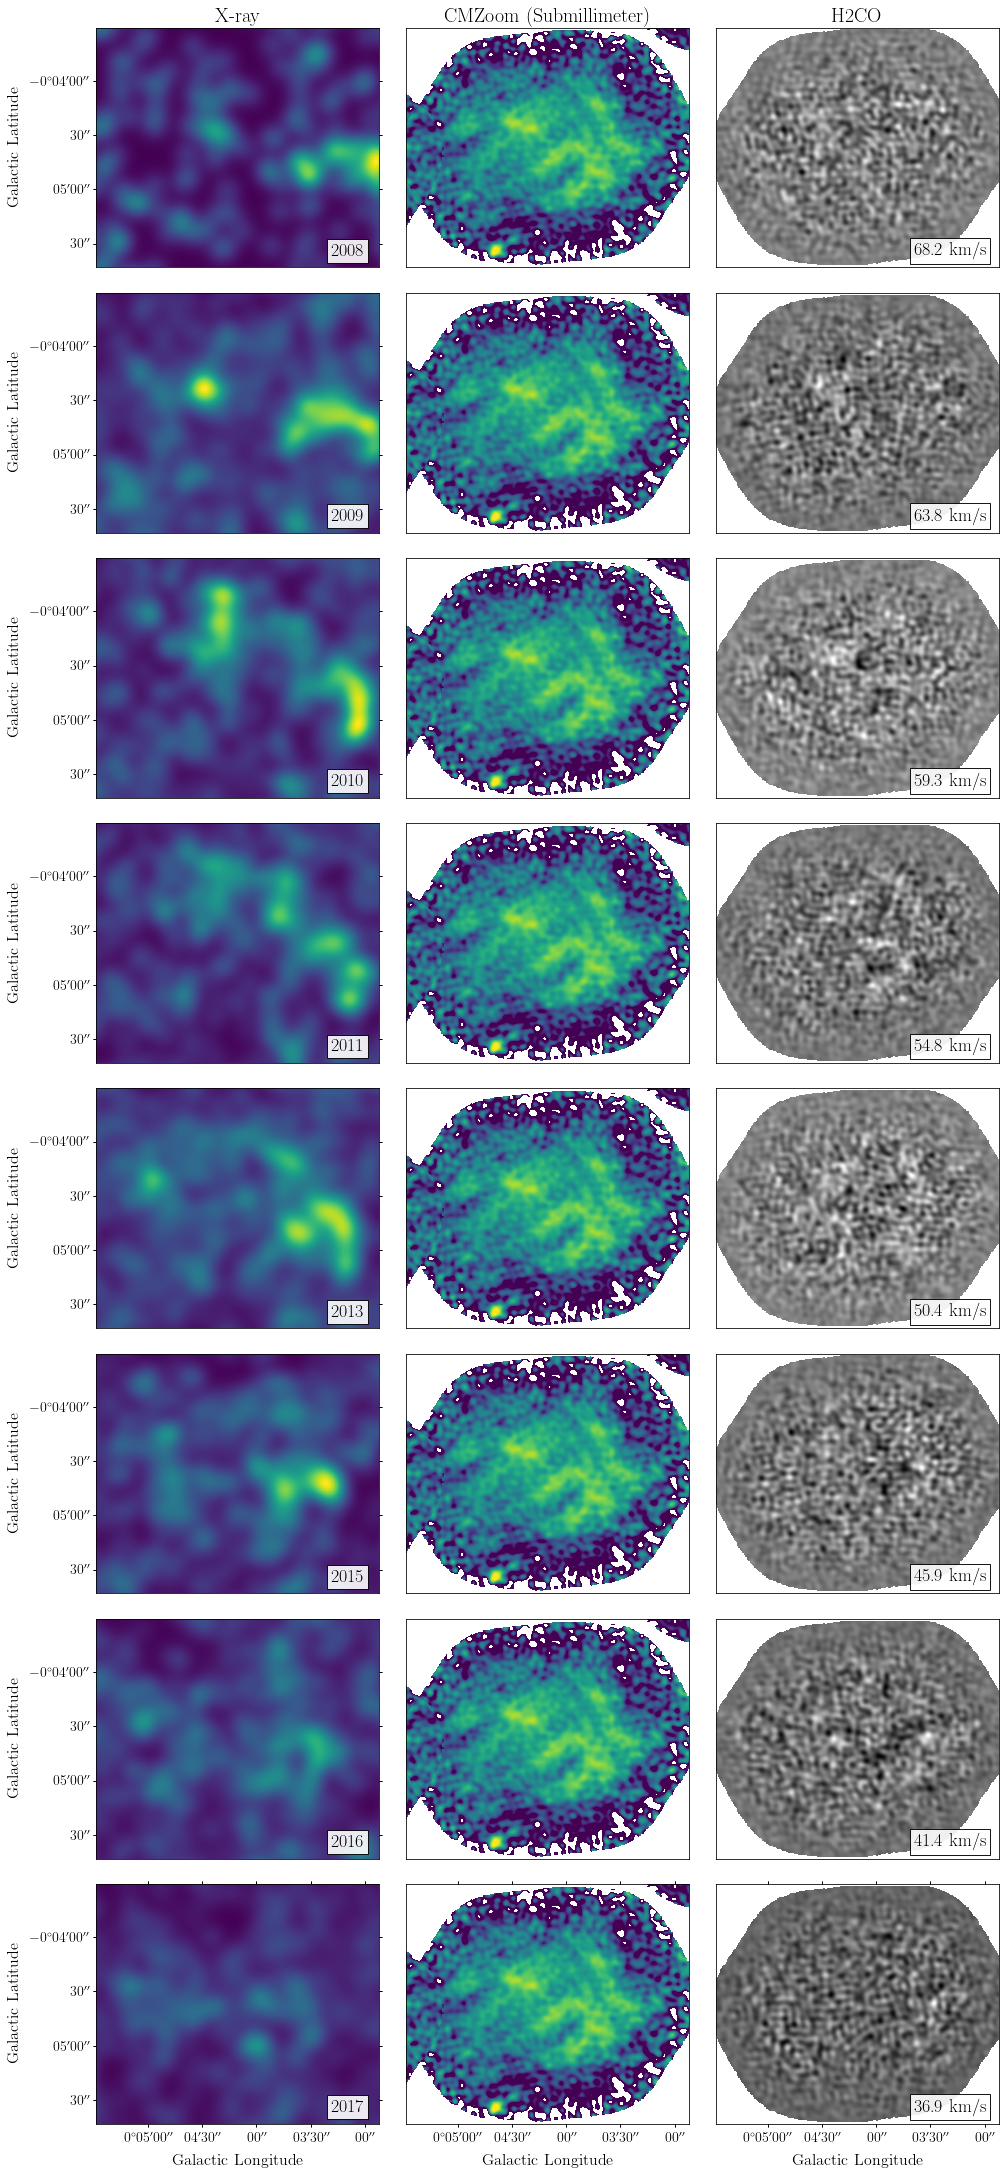

In [80]:
x_min = 593
x_max = 905
y_min = 140
y_max = 405
# Assuming col and row are defined somewhere
years = [2008, 2009, 2010, 2011, 2013, 2015, 2016, 2017]
files = [x3_hdu.data, hdu_cmzoom.data, h2co_cube]

matplotlib.rcParams['font.sans-serif'] = "georgia"   
col = len(years)
row = len(files)

cube_projections = [wcs_3xray_2axis, wcs_cmzoom, wcs_H2CO_2axis]  # Different projections for each subplot

# Create a figure
fig_raw_data = plt.figure(figsize=(15, 30))
counter = 0

# Extract coordinates from the second column for cropping
middle_cube = files[1]
middle_wcs = cube_projections[1]

# Get the pixel limits for the second column

# Convert pixel coordinates to world coordinates for column 2
ra_min, dec_min = middle_wcs.all_pix2world(x_min, y_min, 0)
ra_max, dec_max = middle_wcs.all_pix2world(x_max, y_max, 0)

print('min:',ra_min, dec_min, " max:", ra_max, dec_max)
# Loop through each data cube variable, its corresponding indexing function, and projection
for i, (cube, indexing_func, projection) in enumerate(zip(files, 
                                                           [xray_index, cmzoom_index, spectral_h2co_index], 
                                                           cube_projections)):

    # Loop through each row
    for j in range(col):
        # Index the cube using the corresponding function
        indexed_cube = indexing_func(cube, j)
        ax = fig_raw_data.add_subplot(col, row, j*row+i+1, projection=projection)  # Use WCS projection
        lon = ax.coords[0]
        lat = ax.coords[1]
        
        # Check projection and create subplot accordingly
        if projection == wcs_3xray_2axis:
            ax.imshow(indexed_cube)
            ax.text(0.83, 0.05, str(years[j]), fontsize=18, bbox=dict(facecolor='white', alpha=0.9), transform=ax.transAxes)
            if j == 0:
                plt.title('X-ray',size=20)
        elif projection == wcs_cmzoom:
            ax.imshow(indexed_cube, norm=LogNorm(vmin=2e7, vmax=2e8))
            ax.set_xlim(x_min, x_max)
            ax.set_ylim(y_min, y_max)
            #ax.contour(x3_hdu.data[8+j], colors='white', 
                       #transform=ax.get_transform(wcs_3xray_2axis), levels=[3e-9])  # Transform to match the middle cube
            if j == 0:
                plt.title('CMZoom (Submillimeter)',size=20)
            ax.set_aspect('equal')
        elif projection == wcs_H2CO_2axis:
            ax.imshow(indexed_cube,cmap='gray')
            #ax.contour(x3_hdu.data[8+j], colors='white', 
                       #transform=ax.get_transform(wcs_3xray_2axis), levels=[3e-9])  # Transform to match the middle cube
            ax.set_aspect('equal')
            ax.text(0.70, 0.05,str(round(h2co_cube_vel_kms[j],1))+ ' km/s',fontsize=18, bbox = dict(facecolor = 'white', alpha = 0.9), transform=ax.transAxes)
            if j == 0:
                plt.title('H2CO',size=20)

        # Convert world coordinates back to pixel coordinates for columns 1 and 3
        if i != 1:  # Check if it's not column 2
            x_min_new, y_min_new = projection.all_world2pix(ra_min, dec_min, 0)
            x_max_new, y_max_new = projection.all_world2pix(ra_max, dec_max, 0)
            ax.set_xlim(x_min_new, x_max_new)
            ax.set_ylim(y_min_new, y_max_new)
        if j*row+i>=(col*row)-row:
            ax.set_xlabel('Galactic Longitude',fontsize=16)
        else:
            lon.set_ticks_visible(False)
            lon.set_ticklabel_visible(False)
            lon.set_axislabel('')

        if i % row == 0:
            ax.set_ylabel('Galactic Latitude',fontsize=16)
        else:
            lat.set_ticks_visible(False)
            lat.set_ticklabel_visible(False)
            lat.set_axislabel('')
        lon.set_ticklabel(size=14)
        lat.set_ticklabel(size=14)
        counter+=1
    plt.tight_layout(pad=0.0, w_pad=0.0, h_pad=0.0)
    

plt.show()

In [ ]:
fig_raw_data.savefig('raw_data.pdf',bbox_inches='tight')

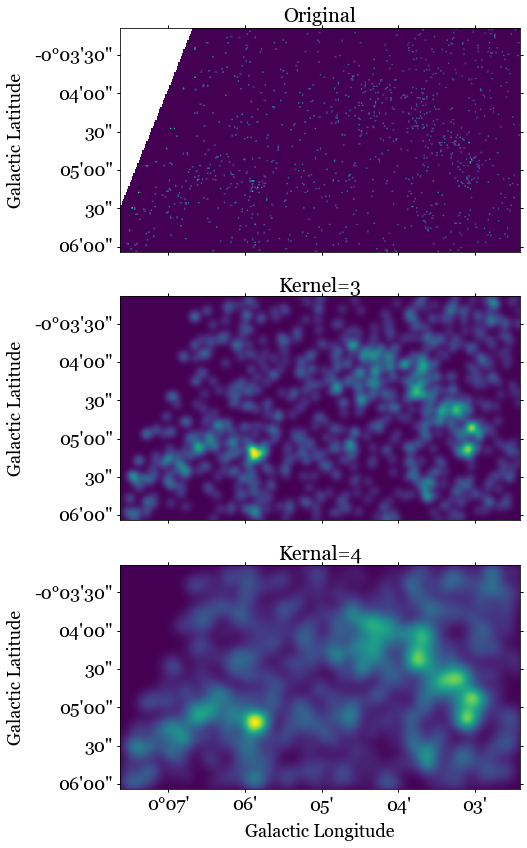

In [ ]:
matplotlib.rcParams['font.sans-serif'] = "georgia"   
col=3
row=3
xray_start=11
fig = plt.figure(figsize=(18,14))
label=['Original', 'Kernel=3', 'Kernal=4','Kernal=6']
#file=[original_hdu.data[xray_start],x3_hdu.data[xray_start],x4_hdu.data[xray_start],x6_hdu.data[xray_start]]
year=0 

coord=plt.subplot(row,col,1 ,projection=wcs_4xray_2axis, slices=('x', 'y'))
lon = coord.coords[0]
lat = coord.coords[1]
plt.imshow(original_hdu.data[xray_start])
plt.ylabel('Galactic Latitude', size=18)

lat.set_ticklabel(size=18)
lon.set_ticklabel_visible(False)
lon.set_axislabel('')
plt.title(label[0], size=20)

year+=1
coord2=plt.subplot(row,col,2 ,projection=wcs_4xray_2axis, slices=('x', 'y'))
lon2 = coord2.coords[0]
lat2 = coord2.coords[1]
plt.imshow(x3_hdu.data[xray_start])
lat2.set_ticklabel(size=18)
lon2.set_ticklabel_visible(False)
lon2.set_axislabel('')
plt.ylabel('Galactic Latitude',size=18)
plt.title(label[1], size=20)


year+=1
coord3=plt.subplot(row,col,3 ,projection=wcs_4xray_2axis, slices=('x', 'y'))
lon3 = coord3.coords[0]
lat3 = coord3.coords[1]
plt.imshow(x4_hdu.data[xray_start])
lat3.set_ticklabel(size=18)
lon3.set_ticklabel(size=18)
plt.title(label[2], size=20)
plt.xlabel('Galactic Longitude',size=18)
#plt.subplot(row,col,4 ,projection=wcs_4xray_2axis, slices=('x', 'y'))
#plt.imshow(x6_hdu.data[xray_start])


if year==0 or year==1:
            #lat.set_ticks_visible(False)
    lat.set_ticklabel_visible(False)
    lat.set_axislabel('')
    
plt.ylabel('Galactic Latitude',size=18)
lon.set_ticklabel(size=18)
lat.set_ticklabel(size=18)

In [ ]:
fig.savefig('kernals.png',bbox_inches='tight')

In [ ]:
hcno = fits.open('data/CMZ_3mm_HNCO.fits')
cube = SpectralCube.read(hcno) 
hcno.close()

sio_spec = fits.open('data/CMZ_3mm_SiO.fits')
sio_cube = SpectralCube.read(sio_spec) 
sio_spec.close()

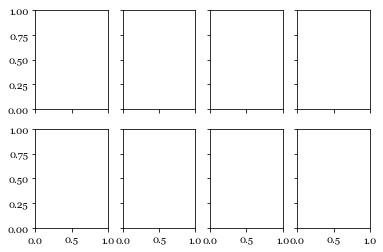

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=4, sharex=True, sharey=True)

# Ratio xray/integrated xray

In [ ]:
from mpl_toolkits.axes_grid1 import ImageGrid
#adding together the intensities from slices 11-16 (2010-2016)
xray_start= 9

for year in range(8):
    if year==0:
        hdu_arr=x4_hdu.data[xray_start]
    else:
        hdu_arr=np.add(hdu_arr,x4_hdu.data[xray_start+year])

#calculate percentages for each 
partial_flux=[]
for i in range(8):
    partial_flux.append(x4_hdu.data[xray_start+i]/hdu_arr*100)

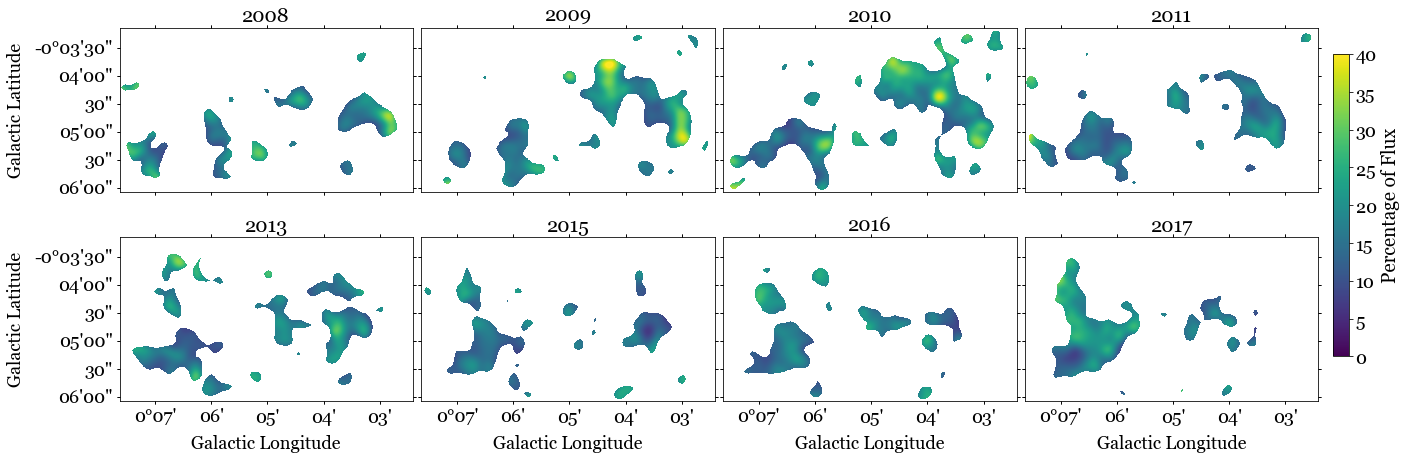

In [ ]:
from astropy.visualization.wcsaxes import WCSAxes
import numpy as np
import scipy
from mpl_toolkits.axes_grid1 import ImageGrid

matplotlib.rcParams['font.sans-serif'] = "georgia"   
col=4
row=2
xray_start=9
fig = plt.figure(figsize=(21,6))
years=['2008','2009','2010','2011','2013','2015','2016','2017']

for year in range(8):
    contours=measure.find_contours(x4_hdu.data[xray_start+year], 2.5e-9)
    coord=plt.subplot(row,col,year+1 ,projection=wcs_4xray_2axis, slices=('x', 'y'))
    lon = coord.coords[0]
    lat = coord.coords[1]
      
    for z in range(len(contours)):
        mask = ski.draw.polygon2mask(partial_flux[year].shape, contours[z])
        result = np.ma.masked_array(partial_flux[year], np.invert(mask))
        plt.imshow(result,vmin=0.0,vmax=40)

        if year<col: #Remove x labels on first row
            #lon.set_ticks_visible(False)
            lon.set_ticklabel_visible(False)
            lon.set_axislabel('')

        if year%col!=0:
            #lat.set_ticks_visible(False)
            lat.set_ticklabel_visible(False)
            lat.set_axislabel('')

    plt.title(years[year], size=20)
    plt.ylabel('Galactic Latitude', size=18)
    plt.xlabel('Galactic Longitude',size=18)
    lon.set_ticklabel(size=18)
    lat.set_ticklabel(size=18)
    
plt.tight_layout()
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.81, 0.15, 0.01, 0.7])

for ax in axes.flat:
    im = ax.imshow(result,vmin=0.0,vmax=40)
cbar=fig.colorbar(im, cax=cbar_ax)

cbar.ax.tick_params(labelsize=18)
cbar.set_label(label='Percentage of Flux',size=19)
fig.savefig('xray_flux_ratio_percentages.png',bbox_inches='tight')


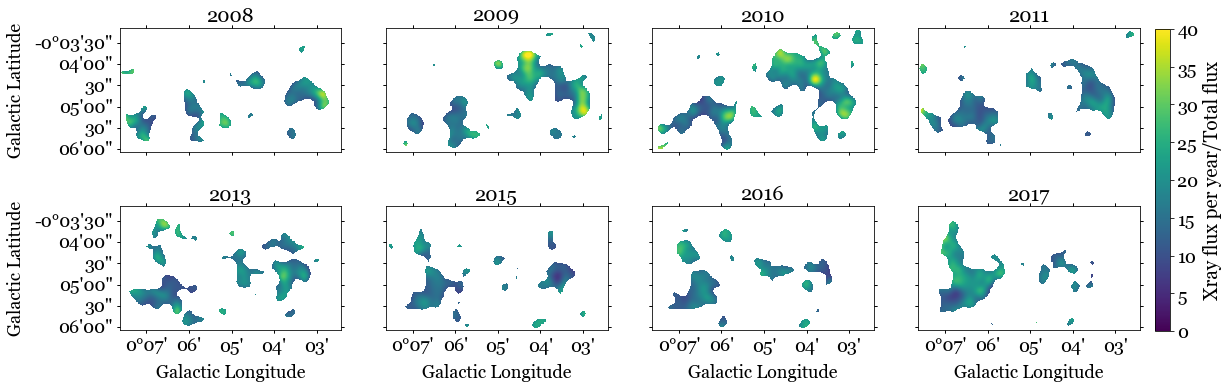

In [ ]:
from astropy.visualization.wcsaxes import WCSAxes
import numpy as np
import scipy
from mpl_toolkits.axes_grid1 import ImageGrid

matplotlib.rcParams['font.sans-serif'] = "georgia"   

xray_start=9
fig = plt.figure(figsize=(21,6))
years=['2008','2009','2010','2011','2013','2015','2016','2017']

for year in range(8):
    contours=measure.find_contours(x4_hdu.data[xray_start+year], 2.5e-9)
    coord=plt.subplot(row,col,year+1 ,projection=wcs_4xray_2axis, slices=('x', 'y'))
    lon = coord.coords[0]
    lat = coord.coords[1]
      
    for z in range(len(contours)):
        mask = ski.draw.polygon2mask(partial_flux[year].shape, contours[z])
        result = np.ma.masked_array(partial_flux[year], np.invert(mask))
        plt.imshow(result,vmin=0.0,vmax=40)

        if year<col: #Remove x labels on first row
            #lon.set_ticks_visible(False)
            lon.set_ticklabel_visible(False)
            lon.set_axislabel('')

        if year%col!=0:
            #lat.set_ticks_visible(False)
            lat.set_ticklabel_visible(False)
            lat.set_axislabel('')

    plt.title(years[year], size=20)
    plt.ylabel('Galactic Latitude', size=18)
    plt.xlabel('Galactic Longitude',size=18)
    lon.set_ticklabel(size=18)
    lat.set_ticklabel(size=18)
    ax.set_xlim(515.5, 532.5)
    ax.set_ylim(64, 79)
    
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.81, 0.15, 0.01, 0.7])

for ax in axes.flat:
    im = ax.imshow(result,vmin=0.0,vmax=40)
cbar=fig.colorbar(im, cax=cbar_ax)

cbar.ax.tick_params(labelsize=18)
cbar.set_label(label='Xray flux per year/Total flux',size=19)
fig.savefig('xray_flux_ratio_2010_2017.png',bbox_inches='tight')

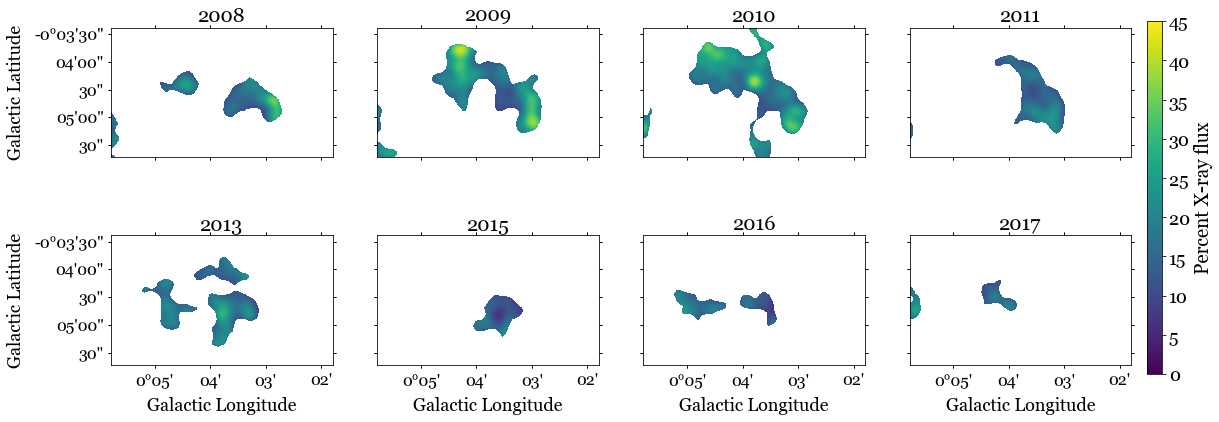

In [ ]:
from astropy.visualization.wcsaxes import WCSAxes
import numpy as np
import scipy
from mpl_toolkits.axes_grid1 import ImageGrid

matplotlib.rcParams['font.sans-serif'] = "georgia"   

xray_start=9
fig = plt.figure(figsize=(21,7))
years=['2008','2009','2010','2011','2013','2015','2016','2017']

for year in range(8):
    contours=measure.find_contours(x4_hdu.data[xray_start+year], 2.5e-9)
    coord=plt.subplot(row,col,year+1 ,projection=wcs_4xray_2axis, slices=('x', 'y'))
    lon = coord.coords[0]
    lat = coord.coords[1]
    
    for j in contours:
        if max(j[:,1])-min(j[:,1])>30:
            mask = ski.draw.polygon2mask(partial_flux[year].shape, j)
            result = np.ma.masked_array(partial_flux[year], np.invert(mask))
            plt.imshow(result,vmin=0,vmax=45)

        if year<col: #Remove x labels on first row
            lon.set_ticklabel_visible(False)
            lon.set_axislabel('')

        if year%col!=0:
            lat.set_ticklabel_visible(False)
            lat.set_axislabel('')

    plt.title(years[year], size=20)
    plt.ylabel('Galactic Latitude', size=18)
    plt.xlabel('Galactic Longitude',size=18)
    lon.set_ticklabel(size=16)
    lat.set_ticklabel(size=16)
    plt.xlim(110, 350)
    plt.ylim(20, 160)
    
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.81, 0.15, 0.01, 0.7])

for ax in axes.flat:
    im = ax.imshow(result,vmin=0,vmax=45)
cbar=fig.colorbar(im, cax=cbar_ax)

cbar.ax.tick_params(labelsize=18)
cbar.set_label(label='Percent X-ray flux',size=19)
fig.savefig('stone_xray_flux_ratio_2010_2017.png',bbox_inches='tight')

# New density method!

In [4]:
# Making integrated X-ray image

len_xray = 17

for i in range(11, len_xray, 1):
    if i == 11:
        xray_int = xray_updated_hdu.data[i]
        #print(i)
    else:
        xray_int = xray_int + xray_updated_hdu.data[i]

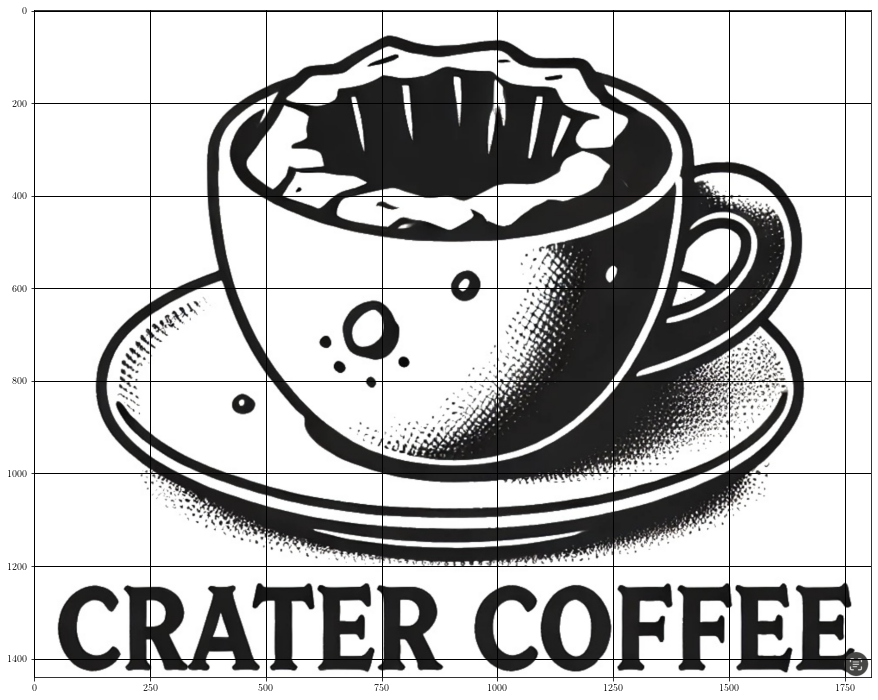

In [67]:
import matplotlib.pyplot as plt
import numpy as np
image = plt.imread("../../Desktop/crater_coffee_logo.png")

fig=plt.figure(figsize=(15,15))
# Display the image
plt.imshow(image)

# Add gridlines
plt.grid(True, color='black', linestyle='-', linewidth=1)


plt.show()

In [68]:
fig.savefig('../../Desktop/crater_coffee_logo_gridlines.pdf')